In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


In [6]:
counts = {
    'SMILES':df['SMILES'].notna().sum(),
    'Tg': df['Tg'].notna().sum(),
    'FFV': df['FFV'].notna().sum(),
    'Tc': df['Tc'].notna().sum(),
    'Density': df['Density'].notna().sum(),
    'Rg': df['Rg'].notna().sum()
}
counts

{'SMILES': 7973, 'Tg': 511, 'FFV': 7030, 'Tc': 737, 'Density': 613, 'Rg': 614}

*CC(*)C(=O)OCCCCCCOc1ccc(-c2ccc(C#N)cc2)cc1


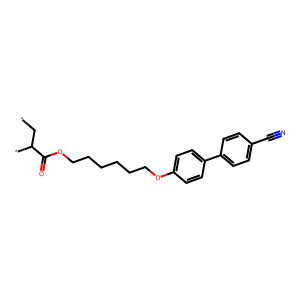

In [16]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
i = 50
print(df.loc[i, 'SMILES'])
mol = Chem.MolFromSmiles(df.loc[i, 'SMILES'])
Draw.MolToImage(mol)

In [24]:
from torch_geometric.data import Data
import torch

def mol_to_graph(smiles: str) -> Data:
    mol = Chem.MolFromSmiles(smiles)
    
    atom_features = []
    for atom in mol.GetAtoms():
            atom_features.append([
            atom.GetAtomicNum(),                      # 原子序号（C=6, O=8...）
            atom.GetTotalDegree(),                    # 键连数
            atom.GetFormalCharge(),                   # 形式电荷
            atom.GetTotalNumHs(),                     # 氢原子数（包括显式/隐式）
            int(atom.GetIsAromatic()),                # 是否为芳香性
            int(atom.GetHybridization()),             # 杂化类型（SP=0, SP2=1, ...）
            int(atom.IsInRing()),                     # 是否在环中    
        ])

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bond_type = bond.GetBondTypeAsDouble() # 键型

        edge_index += [[i, j], [j, i]]
        edge_attr += [[bond_type], [bond_type]]

    data = Data(
        x=torch.tensor(atom_features, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
        edge_attr=torch.tensor(edge_attr, dtype=torch.float)
    )

    return data
gometric_data = mol_to_graph(df.loc[i, 'SMILES'])
gometric_data.x

tensor([[0., 1., 0., 0., 0., 0., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 1., 0., 4., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [6., 3., 0., 0., 0., 3., 0.],
        [8., 1., 0., 0., 0., 3., 0.],
        [8., 2., 0., 0., 0., 3., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [6., 4., 0., 2., 0., 4., 0.],
        [8., 2., 0., 0., 0., 3., 0.],
        [6., 3., 0., 0., 1., 3., 1.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6., 3., 0., 0., 1., 3., 1.],
        [6., 3., 0., 0., 1., 3., 1.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6., 3., 0., 0., 1., 3., 1.],
        [6., 2., 0., 0., 0., 2., 0.],
        [7., 1., 0., 0., 0., 2., 0.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6., 3., 0., 1., 1., 3., 1.],
        [6.,